# Tensorflow: GETTING STARTED

Tensorflow is an open-source machine learning library for research and production. (https://www.tensorflow.org/tutorials)

**Conceptual diagram of Tensorflow 2.0**

![](https://miro.medium.com/max/700/0*fJ5u2WE51Oz44dr_)

- Easy model building with `Keras` and `eager execution`.
- Robust model deployment in production on any platform.
- Powerful experimentation for research.
- `Simplifying the API` by cleaning up deprecated APIs and reducing duplication.

### [참고] Eager execution?

![](https://1.bp.blogspot.com/-CThvwj-LRq4/WuucqLXkYII/AAAAAAAAAlw/LYRt4pkuu4wnyw6BGV9H0bSIZ4HRmdJ2gCEwYBhgL/s1600/Screen%2BShot%2B2018-05-04%2Bat%2B8.30.40%2BAM.png)
(출처: https://developers-kr.googleblog.com/2018/05/eager-execution.html)

## Import Tensorflow & Check the Version

In [1]:
import tensorflow as tf
tf.__version__

'2.0.0-rc0'

## Hello World example

In [2]:
# Create a constant Tensor
hello = tf.constant("hello world")
print(hello)

tf.Tensor(b'hello world', shape=(), dtype=string)


In [3]:
# To access the Tensor value, call numpy().
print(hello.numpy())

b'hello world'


# Basic Tensor Operations

In [4]:
# Define tensor constants.
a = tf.constant(2)
b = tf.constant(3)
c = tf.constant(5)

In [5]:
# Various tensor operations.
# Note: Tensors also support python operators (+, *, ...)
add = tf.add(a, b)
sub = tf.subtract(a, b)
mul = tf.multiply(a, b)
div = tf.divide(a, b)

# Access tensors value.
print("add =", add.numpy())
print("sub =", sub.numpy())
print("mul =", mul.numpy())
print("div =", div.numpy())

add = 5
sub = -1
mul = 6
div = 0.6666666666666666


In [6]:
# Some more operations.
mean = tf.reduce_mean([a, b, c])
sum_ = tf.reduce_sum([a, b, c])

# Access tensors value.
print("mean =", mean.numpy())
print("sum =", sum_.numpy())

mean = 3
sum = 10


In [7]:
# Matrix multiplications.
matrix1 = tf.constant([[1., 2.], [3., 4.]])
matrix2 = tf.constant([[5., 6.], [7., 8.]])

product = tf.matmul(matrix1, matrix2)

In [8]:
# Display Tensor.
product

<tf.Tensor: id=26, shape=(2, 2), dtype=float32, numpy=
array([[19., 22.],
       [43., 50.]], dtype=float32)>

In [9]:
# Convert Tensor to Numpy.
product.numpy()

array([[19., 22.],
       [43., 50.]], dtype=float32)

# Numpy와 Tensorflow의 데이터 배열
- `tf.Tensor` vs. `np.ndarray`

- `tf.Tensor`는 numpy array와 달리 GPU (혹은 TPU)에서 사용할 수 있다.
- 각각의 `tf.Tensor`는 크기와 데이터 타입을 가지고 있다.
- `tf.Tensor`는 `.numpy()` 메서드를 통해 numpy array로 변환할 수 있다.
  - 즉시 실행 (eager execution) 개념의 도입으로 두 데이터 타입 간 호환성이 높아짐

In [10]:
import numpy as np

ndarray = np.ones([3, 3])

print("텐서플로 연산은 자동적으로 넘파이 배열을 텐서로 변환합니다.")
tensor = tf.multiply(ndarray, 42)
print(tensor)
print()

print('각각의 텐서는 크기와 데이터 타입을 가지고 있습니다.')
print(tensor.shape)
print(tensor.dtype)
print()

print("그리고 넘파이 연산은 자동적으로 텐서를 넘파이 배열로 변환합니다.")
print(np.add(tensor, 1))
print()

print(".numpy() 메서드는 텐서를 넘파이 배열로 변환합니다.")
print(tensor.numpy())
print()

텐서플로 연산은 자동적으로 넘파이 배열을 텐서로 변환합니다.
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)

각각의 텐서는 크기와 데이터 타입을 가지고 있습니다.
(3, 3)
<dtype: 'float64'>

그리고 넘파이 연산은 자동적으로 텐서를 넘파이 배열로 변환합니다.
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]

.numpy() 메서드는 텐서를 넘파이 배열로 변환합니다.
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]



# GPU를 사용한 연산 가속화

- 텐서플로는 연산을 위해 자동적으로 CPU 또는 GPU를 사용할 것인지를 정합니다.
- 그리고 필요시 텐서를 CPU 와 GPU에 복사합니다.

In [11]:
x = tf.random.uniform([3, 3])

print("GPU 사용이 가능한가 : "),
print(tf.test.is_gpu_available())

print("텐서가 GPU #0에 있는가 :  "),
print(x.device.endswith('GPU:0'))

GPU 사용이 가능한가 : 
True
텐서가 GPU #0에 있는가 :  
True


## Toy Example: Linear Regression

#### 주어진 데이터

In [12]:
# our data
train_x = [1,2,3,4]
train_y = [0,-1,-2,-3]

#### 모델 및 손실함수 정의

In [13]:
# Weight and Bias: initialized with fixed values.
W = tf.Variable([.3], dtype=tf.float32, name="weight")
b = tf.Variable([-.3], dtype=tf.float32, name="bias")

# Weight and Bias: initialized randomly.
# W = tf.Variable(rng.randn(), name="weight")
# b = tf.Variable(rng.randn(), name="bias")

# a simple linear model
def linear_model(x):
    return x * W + b

# Mean square error.
def mean_square_loss(y_pred, y_true):
    return tf.reduce_mean(tf.pow(y_pred-y_true, 2))

#### 현재 모델의 예측값 및 손실함수값 확인

In [14]:
# compute all at once.
yhat = linear_model(train_x)
loss = mean_square_loss(yhat, train_y)
print('input:  ', train_x)
print('y_true: ', train_y)
print('y_pred: ', yhat.numpy())
print('loss:   ', loss.numpy())

input:   [1, 2, 3, 4]
y_true:  [0, -1, -2, -3]
y_pred:  [0.         0.3        0.6        0.90000004]
loss:    5.9150004


In [15]:
# compute separately.
for x, y in zip(train_x, train_y):
    yhat = linear_model(x)
    loss = mean_square_loss(yhat, y)
    print('input:  ', x)
    print('y_true: ', y)
    print('y_pred: ', yhat.numpy())
    print('loss:   ', loss.numpy())
    print()

input:   1
y_true:  0
y_pred:  [0.]
loss:    0.0

input:   2
y_true:  -1
y_pred:  [0.3]
loss:    1.6899998

input:   3
y_true:  -2
y_pred:  [0.6]
loss:    6.7599993

input:   4
y_true:  -3
y_pred:  [0.90000004]
loss:    15.210001



#### 손으로 최적해 찾기

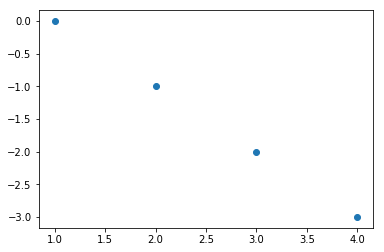

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

# data visualization
plt.scatter(train_x, train_y)

In [17]:
fixW = W.assign([-1.])
fixb = b.assign([1.])

def solution_model(x):
    return x * fixW + fixb

yhat = solution_model(train_x)
loss = mean_square_loss(yhat, train_y)

print('input:  ', train_x)
print('y_true: ', train_y)
print('y_pred: ', yhat.numpy())
print('loss:   ', loss.numpy())

input:   [1, 2, 3, 4]
y_true:  [0, -1, -2, -3]
y_pred:  [ 0. -1. -2. -3.]
loss:    0.0


#### 그렇지만, 차원이 크고 관계가 복잡하다면...?

#### 데이터를 잘 설명하는 최적의 w, b를 찾기 위한 학습 과정이 필요하다.

In [18]:
# Stochastic gradient descent optimizer.
learning_rate = 0.1
optimizer = tf.optimizers.SGD(learning_rate)

# Optimization process. 
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_model(x)
        loss = mean_square_loss(pred, y)

    # Compute gradients.
    trainable_variables = [W, b]
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [19]:
for step in range(100):
    for x, y in zip(train_x, train_y):
        # Run the optimization to update W and b values.
        run_optimization(x, y)

    yhat = linear_model(train_x)
    loss = mean_square_loss(yhat, train_y)
    if step % 20==0:
        print("step: %i, loss: %f" % (step, loss))

step: 0, loss: 0.000000
step: 20, loss: 0.000000
step: 40, loss: 0.000000
step: 60, loss: 0.000000
step: 80, loss: 0.000000


#### 학습 결과 확인

In [20]:
yhat = linear_model(train_x)
loss = mean_square_loss(yhat, train_y)
print('input:  ', train_x)
print('y_true: ', train_y)
print('y_pred: ', yhat.numpy())
print('loss:   ', loss.numpy())

input:   [1, 2, 3, 4]
y_true:  [0, -1, -2, -3]
y_pred:  [ 0. -1. -2. -3.]
loss:    0.0
